#  Práctica 6. Redes neuronales Convolucionales para clasificación

Utilizar el dataset MNIST (https://www.kaggle.com/datasets/hojjatk/mnist-dataset), e implementar una red neuronal convolucional que clasifique el dataset mencionado.

Importar modulos

In [1]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# indica que el número de canales de color se encuentra en la última dimensión de los datos.
keras.backend.set_image_data_format('channels_last')

importar csvs

In [2]:
for_train = pd.read_csv('./train.csv')
for_test = pd.read_csv('./test.csv')

display("Data entrenamiento", for_train)
display("Data tests", for_test)


'Data entrenamiento'

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'Data tests'

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Copiar datasets y trabajar con copias

In [3]:
X_train = for_train.drop('label', axis=1).copy()
X_test = for_test.copy()
Y_train = for_train['label'].copy()

In [4]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
#para normalizar entre 0 y 255
#siendo 255 el valor con total negro
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Reshape para hacer cuadros de 28 * 28, y hacer mas sencillo el entrenamiento
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [7]:
#porcentaje para validar el modelo, el resto es enternamiento
porcentaje_para_validacion = 0.3

#y usamos la func para dividir 
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size= porcentaje_para_validacion)

In [8]:
#Hot encoding =  etiquetas binarias
Y_train = keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = keras.utils.to_categorical(Y_val, num_classes=10)

In [9]:
def RED_CNN():
    model = keras.Sequential()
    
    ''' 2 capas de convolución con 32 filtros de tamaño 3x3 y un paso de desplazamiento de 1x1. Esto produce 32 mapas de características.
    El padding se establece en 'same', lo que significa que el tamaño de la salida es el mismo que el de la entrada.
    Una capa de normalización por lotes (Batch Normalization) para normalizar las activaciones de la capa anterior.
    Una función de activación ReLU para introducir no linealidad en la red.
    Una capa de Max Pooling para reducir la dimensionalidad de las características.
    Una capa de Dropout para regularizar la red y prevenir el sobreajuste.'''
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='valid', input_shape=(28, 28, 1), name='conv2d_1_1'))
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='same', name='conv2d_1_2'))
    model.add(layers.BatchNormalization(name='bn_1'))
    model.add(layers.Activation('relu', name='relu_1'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_1'))
    model.add(layers.Dropout(0.2, name='drop_1'))
    
    '''Dos capas de convolución con 64 filtros cada una.
    Capas de Batch Normalization y activación ReLU.
    Capas de Max Pooling y Dropout.'''
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='valid', name='conv2d_2_1'))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='same', name='conv2d_2_2'))
    model.add(layers.BatchNormalization(name='bn_2'))
    model.add(layers.Activation('relu', name='relu_2'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_2'))
    model.add(layers.Dropout(0.2, name='drop_2'))
    
    '''Una capa Flatten para aplanar las características en un solo vector.
    Una capa densa con 100 unidades y activación ReLU.
    Una capa de salida densa con 10 unidades y activación softmax, que se utiliza para clasificar las imágenes en 10 clases diferentes.'''
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [10]:
modelo_CNN = RED_CNN()

In [11]:
#adam como sustituto de SGD y ajuste automatico a Alfa en training
#la perdida se calcula con ese algo para usar onehot encoding

modelo_CNN.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [12]:
modelo_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1_1 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 conv2d_1_2 (Conv2D)         (None, 26, 26, 32)        9248      
                                                                 
 bn_1 (BatchNormalization)   (None, 26, 26, 32)        128       
                                                                 
 relu_1 (Activation)         (None, 26, 26, 32)        0         
                                                                 
 mp2d_1 (MaxPooling2D)       (None, 13, 13, 32)        0         
                                                                 
 drop_1 (Dropout)            (None, 13, 13, 32)        0         
                                                                 
 conv2d_2_1 (Conv2D)         (None, 11, 11, 64)        1

In [13]:
#Mi compu usa el CPU al 100% y se calienta demasiado jaja, por lo que 3 epochs es sufuciente pa lograr buen accuracy (best = 0.04)

ENTRENAMIENTO = modelo_CNN.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=3, verbose=1)

Epoch 1/3
460/460 [==============================] - 73s 155ms/step - loss: 0.2307 - accuracy: 0.9284 - val_loss: 0.1112 - val_accuracy: 0.9647
Epoch 2/3
460/460 [==============================] - 69s 151ms/step - loss: 0.0700 - accuracy: 0.9783 - val_loss: 0.0511 - val_accuracy: 0.9831
Epoch 3/3
460/460 [==============================] - 75s 162ms/step - loss: 0.0584 - accuracy: 0.9811 - val_loss: 0.0525 - val_accuracy: 0.9826


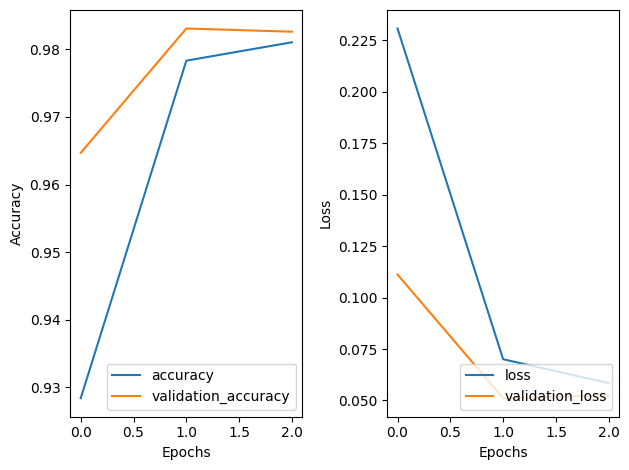

In [14]:
#val = validation

plt.subplot(1, 2, 1)
plt.plot(ENTRENAMIENTO.history['accuracy'], label='accuracy')
plt.plot(ENTRENAMIENTO.history['val_accuracy'], label='validation_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(ENTRENAMIENTO.history['loss'], label='loss')
plt.plot(ENTRENAMIENTO.history['val_loss'], label='validation_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Fase de prediccion

func para checar prediccion

In [15]:
def predict(model, X, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

1/1 [==============================] - 0s 175ms/step


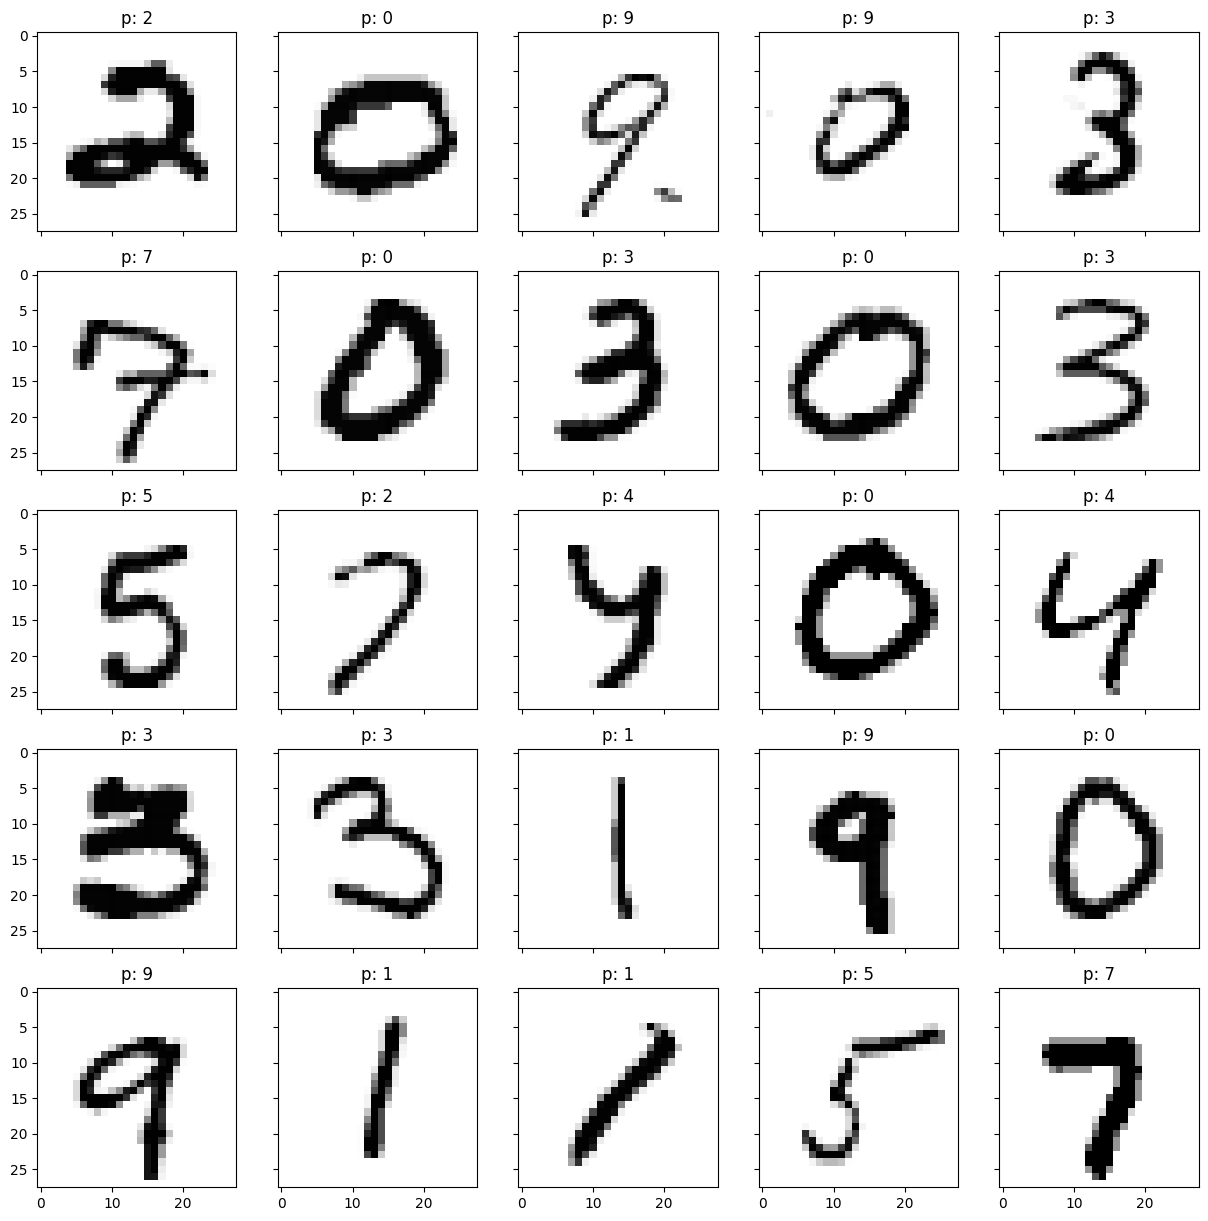

In [16]:
predict(modelo_CNN, X_test, 25)